In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.005)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

: 	0.8759936038578782
itr 73
Iteration 73/500: 	0.8746486913377993
itr 74
Iteration 74/500: 	0.8734068112952686
itr 75
Iteration 75/500: 	0.8722577674366604
itr 76
Iteration 76/500: 	0.8711925043123905
itr 77
Iteration 77/500: 	0.8702030360141647
itr 78
Iteration 78/500: 	0.869282089661215
itr 79
Iteration 79/500: 	0.8684233906113099
itr 80
Iteration 80/500: 	0.8676209494332286
itr 81
Iteration 81/500: 	0.8668699175397926
itr 82
Iteration 82/500: 	0.8661657315548336
itr 83
Iteration 83/500: 	0.8655041846159462
itr 84
Iteration 84/500: 	0.8648816402827468
itr 85
Iteration 85/500: 	0.8642946760231089
itr 86
Iteration 86/500: 	0.8637405110296802
itr 87
Iteration 87/500: 	0.8632161505868502
itr 88
Iteration 88/500: 	0.8627195269147926
itr 89
Iteration 89/500: 	0.8622481444171656
itr 90
Iteration 90/500: 	0.8618002205251534
itr 91
Iteration 91/500: 	0.8613739726699401
itr 92
Iteration 92/500: 	0.860967475677205
itr 93
Iteration 93/500: 	0.860579588702906
itr 94
Iteration 94/500: 	0.86020895

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[6.065115384966414, 5.922638795086157, 5.779948296948014, 5.637073552497079, 5.494050498320678, 5.3509179231162385, 5.207718608535338, 5.064498188339662, 4.92130914135514, 4.778204516829732, 4.63524820202979, 4.492505795487734, 4.350052022488318, 4.207969594224591, 4.06635091906396, 3.925299528603242, 3.7849323593567465, 3.6453820344443635, 3.506800856545707, 3.369359096634054, 3.2332532650956485, 3.098704400463639, 2.965962347583236, 2.8353074688777746, 2.7070509295597254, 2.581532415942611, 2.459120420652015, 2.340203258478753, 2.2251852160302277, 2.1144738598404644, 2.008466631452614, 1.9075371572904498, 1.8120171377591998, 1.7221820866950204, 1.638236357786945, 1.5603014509254527, 1.4884118766428154, 1.4225121613974883, 1.36246283700533, 1.3080485691534025, 1.2589911345009492, 1.2149645368629527, 1.175610265999197, 1.140551843375803, 1.109407442752446, 1.081802082953052, 1.0573749007465683, 1.0357855680946992, 1.0167182851060528, 0.9998836339077103, 0.985019505581009, 0.97252733462

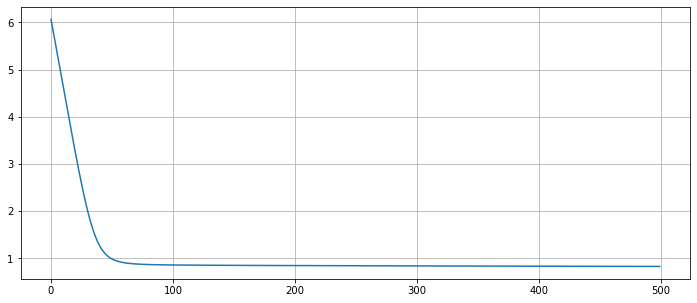

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.62449074]
 [0.16693985]
 [0.20856942]]
[0. 0. 1.] <-> [[0.5202292 ]
 [0.3288896 ]
 [0.15088117]]
[0. 0. 1.] <-> [[0.4747712 ]
 [0.32529908]
 [0.19992977]]
[1. 0. 0.] <-> [[0.6281326 ]
 [0.16586637]
 [0.20600101]]
[1. 0. 0.] <-> [[0.5145956 ]
 [0.22990148]
 [0.25550285]]
[1. 0. 0.] <-> [[0.69383687]
 [0.14631559]
 [0.15984748]]
[1. 0. 0.] <-> [[0.7423452 ]
 [0.13069096]
 [0.12696381]]
[0. 0. 1.] <-> [[0.5179424 ]
 [0.32932654]
 [0.15273103]]
[1. 0. 0.] <-> [[0.72826105]
 [0.1353259 ]
 [0.13641311]]
[1. 0. 0.] <-> [[0.599757  ]
 [0.18596086]
 [0.21428213]]
[1. 0. 0.] <-> [[0.56721216]
 [0.19784278]
 [0.23494509]]
[1. 0. 0.] <-> [[0.62183744]
 [0.16776831]
 [0.21039432]]
[1. 0. 0.] <-> [[0.64934224]
 [0.15972063]
 [0.19093718]]
[1. 0. 0.] <-> [[0.76585156]
 [0.12284769]
 [0.1113007 ]]
[1. 0. 0.] <-> [[0.6215149 ]
 [0.16788086]
 [0.21060419]]
[1. 0. 0.] <-> [[0.6225242 ]
 [0.16754353]
 [0.20993233]]
[1. 0. 0.] <-> [[0.6623623]
 [0.1558885]
 [0.1817493]]
[0. 1. 0.] <-> [[